# Изучение закономерностей, определяющих успешность игр

## Описание проекта
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br><br>
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br><br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h3>Описание данных</h3><br><br>
<b>Name</b> — название игры<br>
<b>Platform</b> — платформа<br>
<b>Year_of_Release</b> — год выпуска<br>
<b>Genre</b> — жанр игры<br>
<b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)<br>
<b>EU_sales</b> — продажи в Европе (миллионы долларов)<br>
<b>JP_sales</b> — продажи в Японии (миллионы долларов)<br>
<b>Other_sales</b> — продажи в других странах (миллионы долларов)<br>
<b>Critic_Score</b> — оценка критиков (максимум 100)<br>
<b>User_Score</b> — оценка пользователей (максимум 10)<br>
<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br><br>
    <i>* Данные за 2016 год могут быть неполными.</i><br>

## Загружаем библиотеки и данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Посмотрим информацию о нашей таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# примерная оценка пропусков
pd.DataFrame(df.isna().mean()).style.background_gradient('coolwarm').format({0:'{:.1%}'})

,0
Name,0.0%
Platform,0.0%
Year_of_Release,1.6%
Genre,0.0%
NA_sales,0.0%
EU_sales,0.0%
JP_sales,0.0%
Other_sales,0.0%
Critic_Score,51.3%
User_Score,40.1%


In [7]:
#Посмотрим на количество пустых значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
#Посмотрим на колличество дубликатов
df.duplicated().sum()

0

## Предобработка данных

In [6]:
# Заменим названия столбцов (приведем к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Приведем столбцы к нижнему регистру
for column in df[['platform','genre']]:
    df[column] = df[column].str.lower()

In [8]:
# Изменим тип данных в столбце year_of_release, что бы год выглядел нормально
df['year_of_release'] = df['year_of_release'].astype('Int64')
#Заменим tbd(означает что данные были пропущенны специально) на Nan
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
# Поменяем формат столбца user_score на float
df['user_score'] = df['user_score'].astype(float)

In [9]:
#Создадим новый столбец total_sales и сложим продажи всех столбцов
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [10]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [14]:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

In [15]:
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

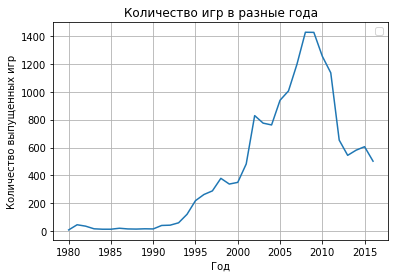

In [11]:
#Посмотрим сколько игр выпускалось в разные годы
games_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_years.plot()
plt.title("Количество игр в разные года")
plt.xlabel("Год")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.grid()
plt.show()

Вывод:

- На графике видно, что активной рост производства игр начался в 2000 году, достиг своего пика в 2007-2009 годах, и после начался уверенный спад производства.
- Предположим, что спад связан с появлением смартфонов, и переходом пользователей в мобильное пространство.

### 3.2 - 3.5 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [12]:
platform_sales = pd.pivot_table(df, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values('total_sales',ascending=False)
platform_sales

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


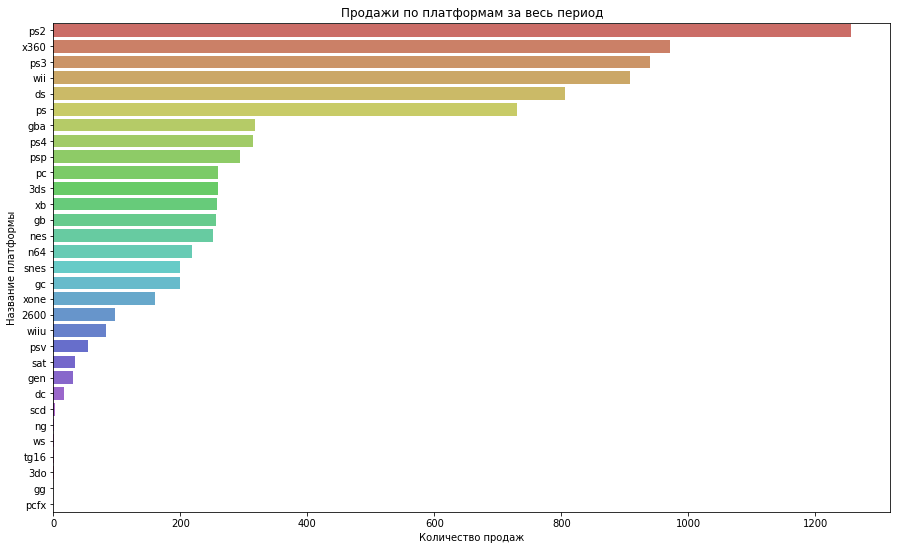

In [13]:
plt.figure(figsize=(15,9))
sns.barplot(x=platform_sales['total_sales'], y=platform_sales.index, palette='hls')
color='blue'
plt.title("Продажи по платформам за весь период")
plt.xlabel("Количество продаж")
plt.ylabel("Название платформы")
plt.show()

In [14]:
top8 = list(platform_sales.index[:8])
top8

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4']

<Figure size 720x360 with 0 Axes>

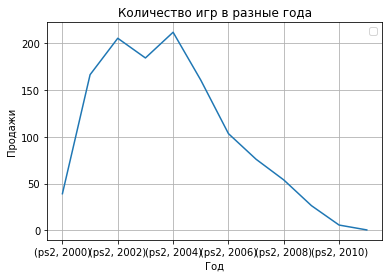

                          total_sales
platform year_of_release             
ps2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45



<Figure size 720x360 with 0 Axes>

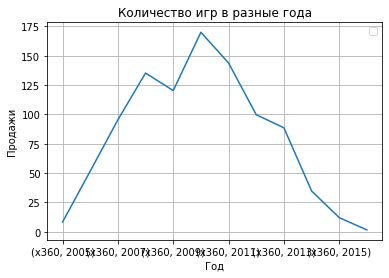

                          total_sales
platform year_of_release             
x360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52



<Figure size 720x360 with 0 Axes>

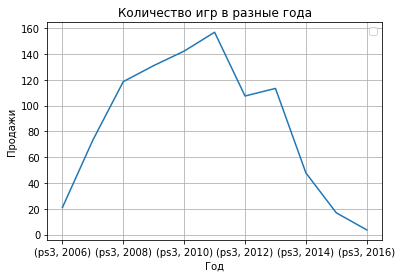

                          total_sales
platform year_of_release             
ps3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60



<Figure size 720x360 with 0 Axes>

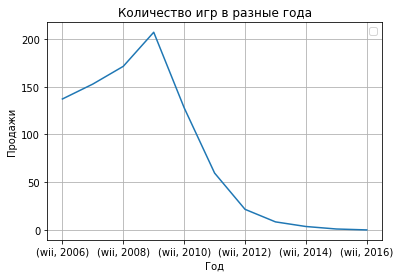

                          total_sales
platform year_of_release             
wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18



<Figure size 720x360 with 0 Axes>

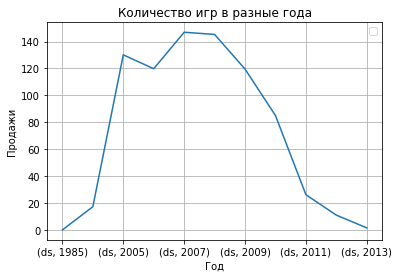

                          total_sales
platform year_of_release             
ds       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54



<Figure size 720x360 with 0 Axes>

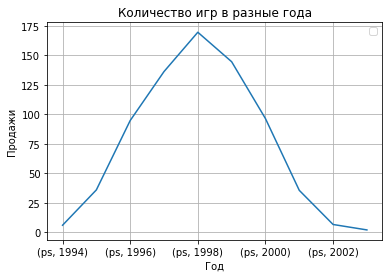

                          total_sales
platform year_of_release             
ps       1994                    6.03
         1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07



<Figure size 720x360 with 0 Axes>

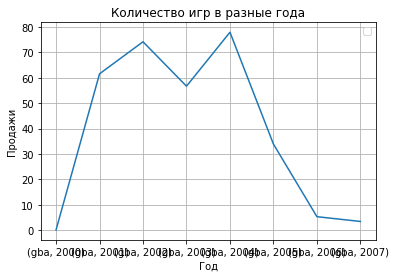

                          total_sales
platform year_of_release             
gba      2000                    0.07
         2001                   61.53
         2002                   74.16
         2003                   56.67
         2004                   77.91
         2005                   33.86
         2006                    5.28
         2007                    3.40



<Figure size 720x360 with 0 Axes>

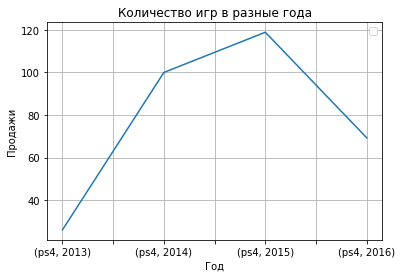

                          total_sales
platform year_of_release             
ps4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25



In [15]:
for platform in top8:
    platform_top8 = pd.pivot_table(df.query('platform == @platform'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    
    plt.figure(figsize=(10, 5))
    platform_top8.plot()
    plt.title("Количество игр в разные года")
    plt.xlabel("Год")
    plt.ylabel("Продажи")
    plt.legend('')
    plt.grid()
    plt.show()
    print(platform_top8)
    print()

Вывод
- Средний срок высокой популярности платформы 6-8 лет, а общий срок жизни около 10 лет
- Можно рассмотреть как сменялись покаления PS по годам:

* PS 1994 - 2003
* PS2 2000 - 2011
* PS3 2006-2016
* PS4 2013 - по настоящее время



- Компания Sony выпускает обновленные приставки каджые 6-7 лет, а игры со старых приставок поддерживаются еще окола 3-5 лет после выхода новых.
- Можно предположить что пик продаж на PS4 придется на 2017-2019 года.

In [16]:
# Примем за актуальный период последние 3 года
df_new = df[df['year_of_release'] > 2013]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


### 3.6 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

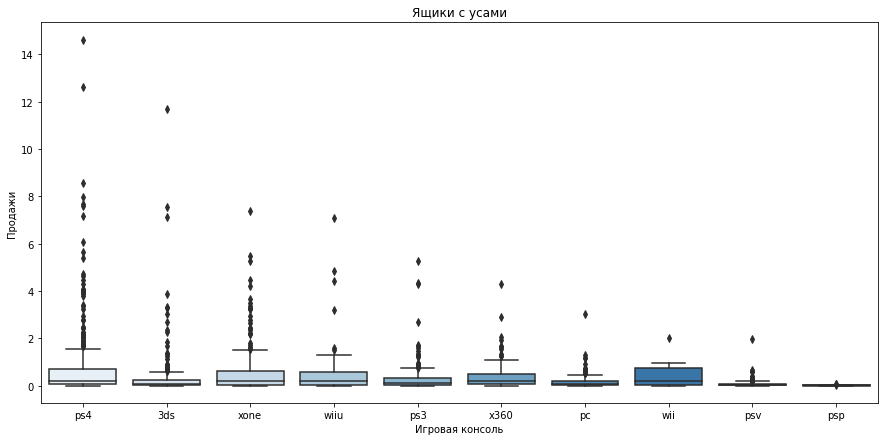

In [17]:
# Ящик с усами
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_new, x='platform', y='total_sales', palette="Blues")
plt.title('Ящики с усами')
plt.xlabel('Игровая консоль')
plt.ylabel('Продажи')
plt.show()

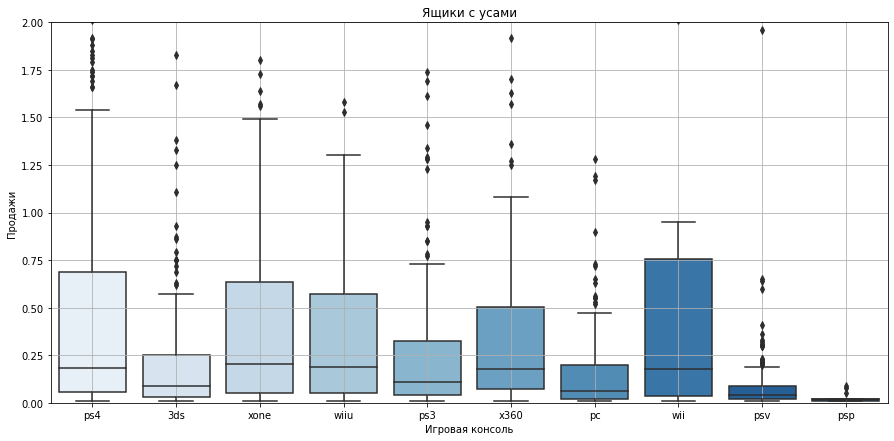

In [18]:
# Ящик с усами
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_new, x='platform', y='total_sales', palette="Blues")
plt.title('Ящики с усами')
plt.xlabel('Игровая консоль')
plt.ylabel('Продажи')
plt.ylim([0, 2])
plt.grid()
plt.show()

Вывод:
    
  - По графикм видно, что медианы на одной границе у  PS4, Xone, X360, WIIU, X360, WII
  - Лидерство продаж распределяется так: Xone, WII, PS4, X360, WIIU.
  - Выбросы имеются у всех моделей

### 3.7 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Для примера используем платформу Xone

In [19]:
# Комментарий ревьюера 2
print(len(df_new.dropna(subset=['user_score'])))
print(len(df_new.dropna(subset=['critic_score'])))
print(len(df_new.dropna(subset=['user_score', 'critic_score'])))

888
718
704


In [20]:
#Корреляция между оценками пользователей и продажами xone
xone = df_new[df_new['platform'] == "xone"]
xone['user_score'].corr(xone['total_sales'])

-0.0703839280647581

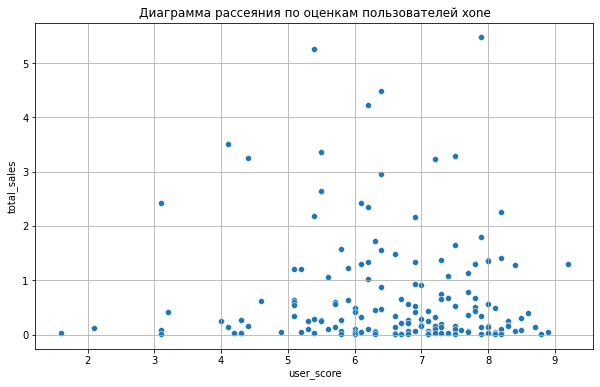

In [21]:
#Диаграмма рассеяния по оценкам пользователей
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sales', data=xone)
plt.title('Диаграмма рассеяния по оценкам пользователей xone')
plt.grid()
plt.show()

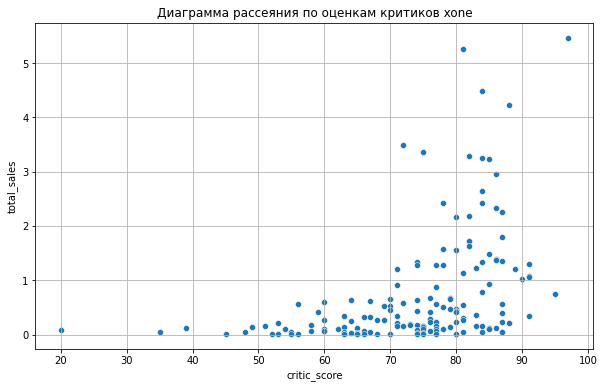

In [22]:
#Диаграмма рассеяния по оценкам критиков 
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone)
plt.title('Диаграмма рассеяния по оценкам критиков xone')
plt.grid()
plt.show()

In [23]:
#Корреляция между оценкой критиков и продажам
xone['critic_score'].corr(xone['total_sales'])

0.428676943703332

### 3.8 Соотнесем выводы с продажами игр на других платформах.

In [24]:
#Напишем функцию, которая будет создавать графики рассеивания и считать корреляции для каждой платформы
def other(name_pl):
    platform = df_new[df_new['platform']==name_pl]
    fig, ax = plt.subplots(1 ,2, figsize=(15,6))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_pl, fontsize=10)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.grid()
    plt.show()
    
    correl = (platform['user_score'].corr(platform['total_sales']))
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    if critic_correl <= 0:
        print('Корреляция между отзывами критиков и игровой платформой ', name_pl, ': Отрицательная', correl)
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_pl, ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_pl, ': Средняя', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_pl, ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_pl, ': Очень высокая', critic_correl)
    if 1 >= critic_correl > 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_pl, ': Наивысшая', critic_correl)
    
    if correl <= 0:
        print('Корреляция между отзывами пользователей и продажами ', name_pl, ': Отрицательная', correl)
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_pl, ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_pl, ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_pl, ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_pl, ': Очень высокая', correl)
    if  correl > 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_pl, ': Наивысшая', correl)
    print('\n')

In [25]:
platforms_list = df_new['platform'].unique()

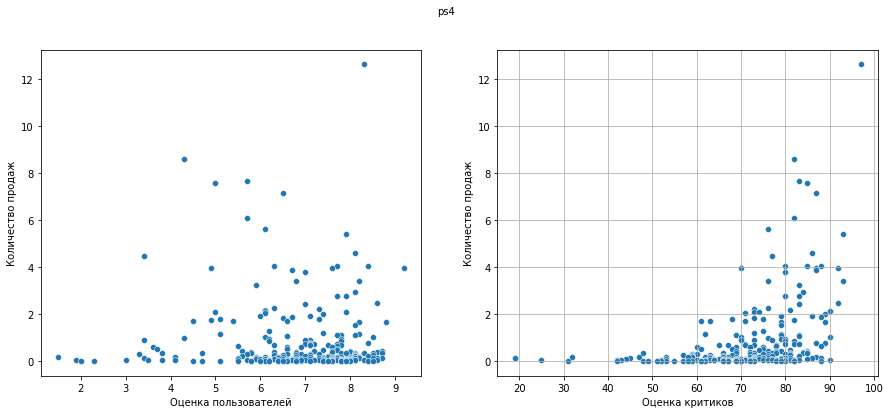

Корреляция между отзывами критиков и игровой платформой  ps4 : Средняя 0.40266141068104117
Корреляция между отзывами пользователей и продажами  ps4 : Отрицательная -0.040131589472697266




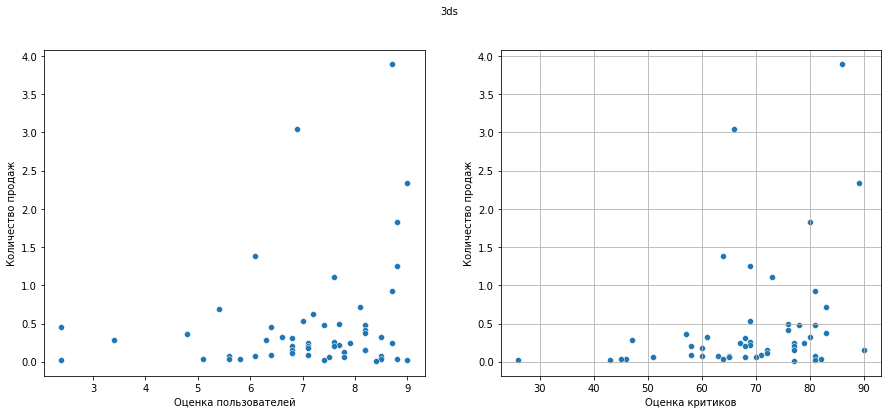

Корреляция между отзывами критиков и игровой платформой  3ds : Средняя 0.31411749286905094
Корреляция между отзывами пользователей и продажами  3ds : Слабая 0.21519327185270273




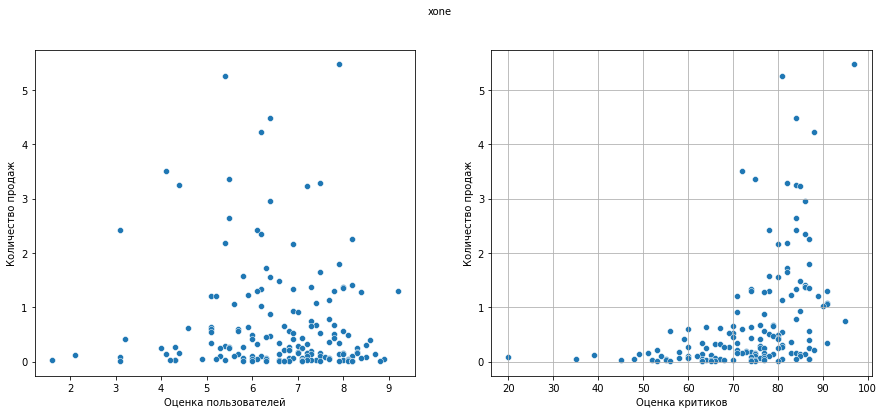

Корреляция между отзывами критиков и игровой платформой  xone : Средняя 0.428676943703332
Корреляция между отзывами пользователей и продажами  xone : Отрицательная -0.0703839280647581




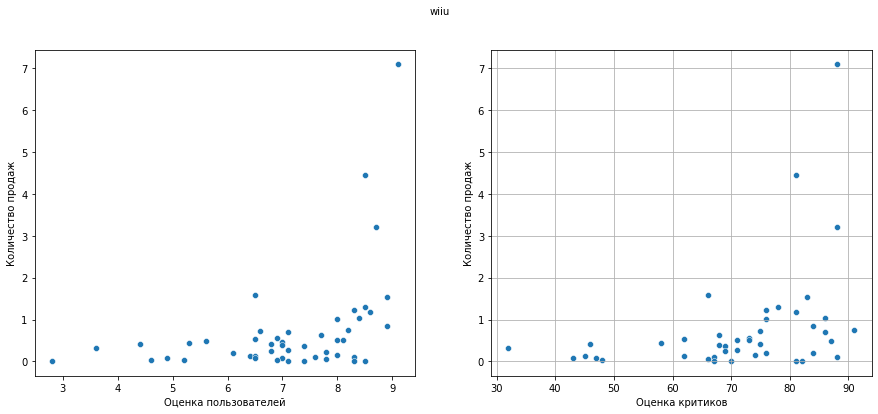

Корреляция между отзывами критиков и игровой платформой  wiiu : Средняя 0.3702014124808841
Корреляция между отзывами пользователей и продажами  wiiu : Умеренная 0.40792645792170795




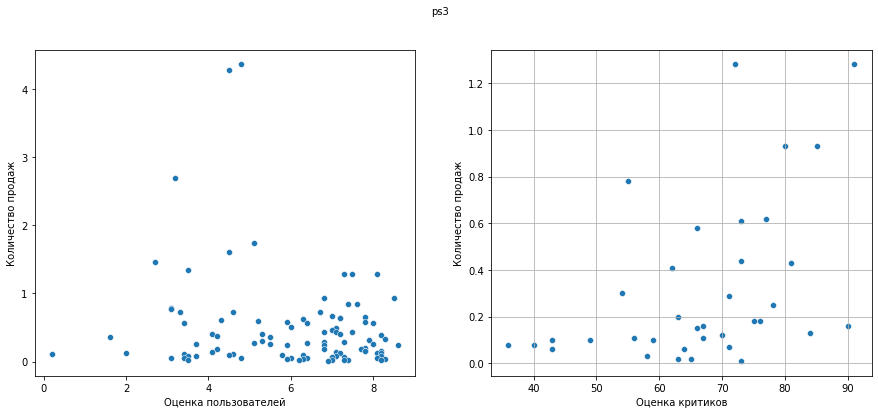

Корреляция между отзывами критиков и игровой платформой  ps3 : Средняя 0.44657460493190715
Корреляция между отзывами пользователей и продажами  ps3 : Отрицательная -0.166761413476621




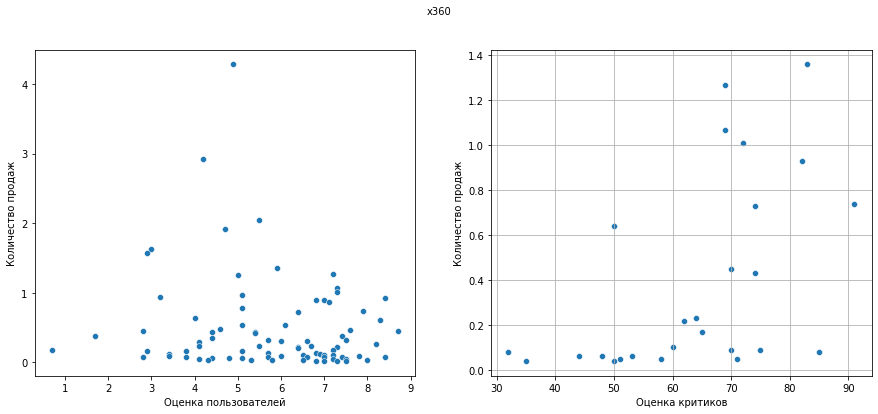

Корреляция между отзывами критиков и игровой платформой  x360 : Высокая 0.5257228356581521
Корреляция между отзывами пользователей и продажами  x360 : Отрицательная -0.13844457094566506




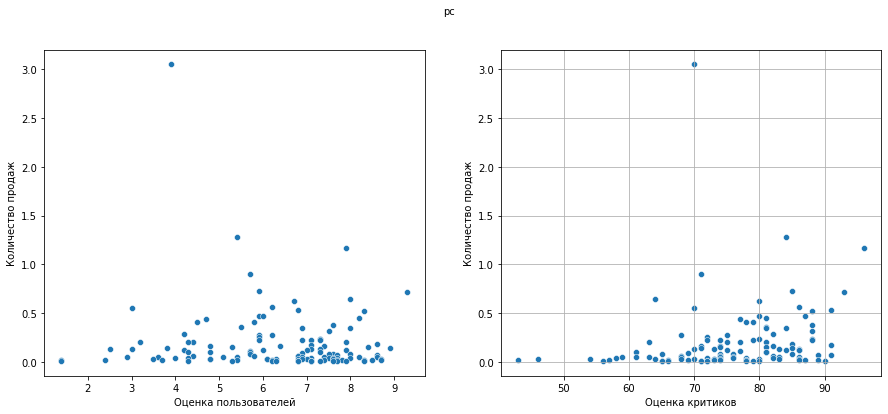

Корреляция между отзывами критиков и игровой платформой  pc : Слабая 0.1746341376935003
Корреляция между отзывами пользователей и продажами  pc : Отрицательная -0.07159665703472451




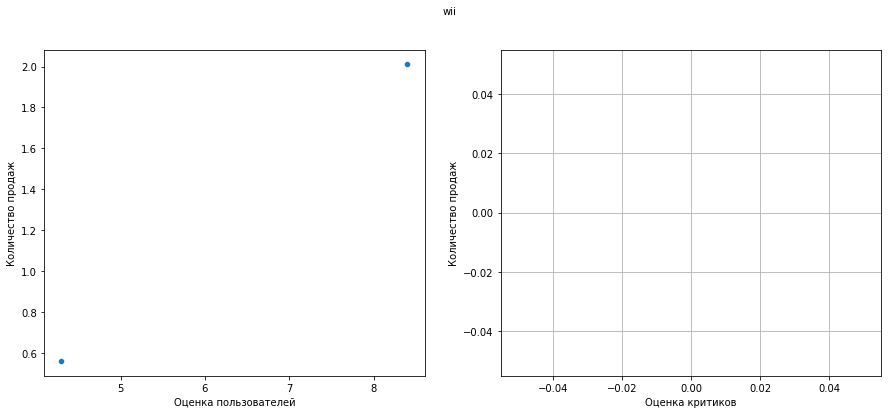

Корреляция между отзывами пользователей и продажами  wii : Наивысшая 1.0




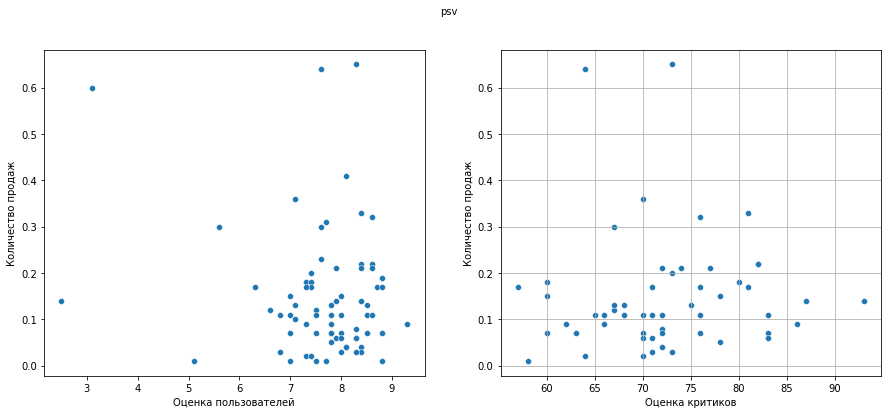

Корреляция между отзывами пользователей и продажами  psv : Отрицательная -0.1684550497806444




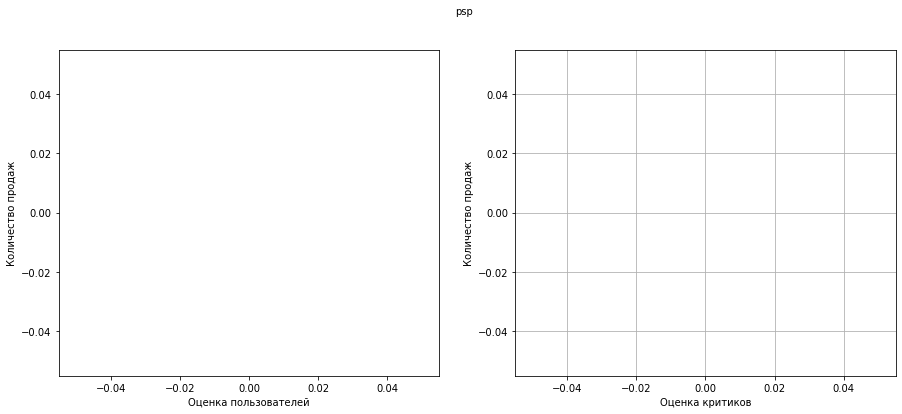

In [26]:
#С помощью цикла выведем все графики
for platform in platforms_list:
    other(platform)

### Вывод 
 - Мы можем заметить у всех платформ корреляцию, между оценками 
пользователей и критиков по отношению к продажам. 
 - Однако оценки пользователей слабо влияет на продажи
 - Оцентки критиков имеют более сильное влияние на продажи. Вероятно люди склонны довкрять оцентам профессионалов.
 - У PS3 одна игра выпущенна, ввиду выбранного временного периода

### 3.9 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [27]:
genre_top = df_new.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_top = genre_top.reset_index().rename_axis(None, axis=1)

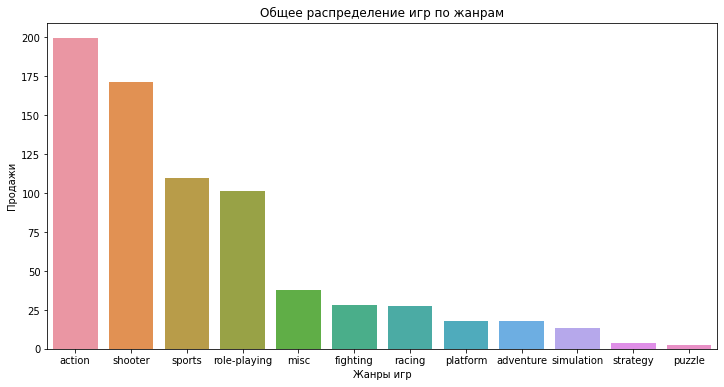

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=genre_top, x='genre', y='total_sales')
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')
plt.show()

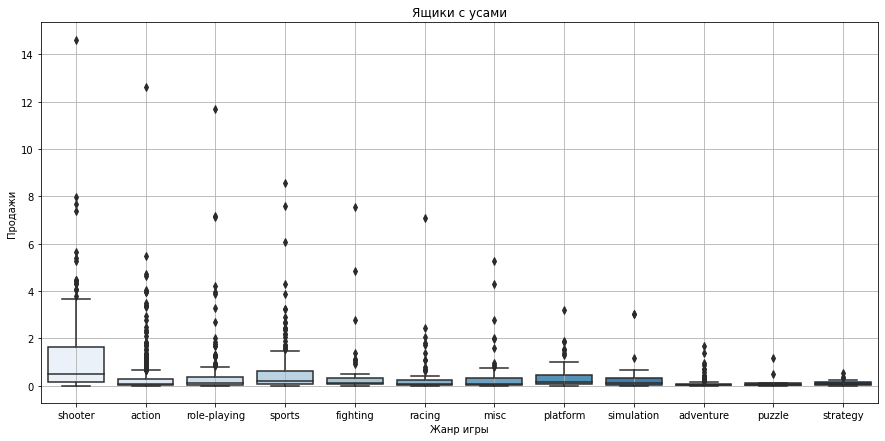

In [29]:
# Ящик с усами
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_new, x='genre', y='total_sales', palette="Blues")
plt.title('Ящики с усами')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи')
plt.grid()
plt.show()

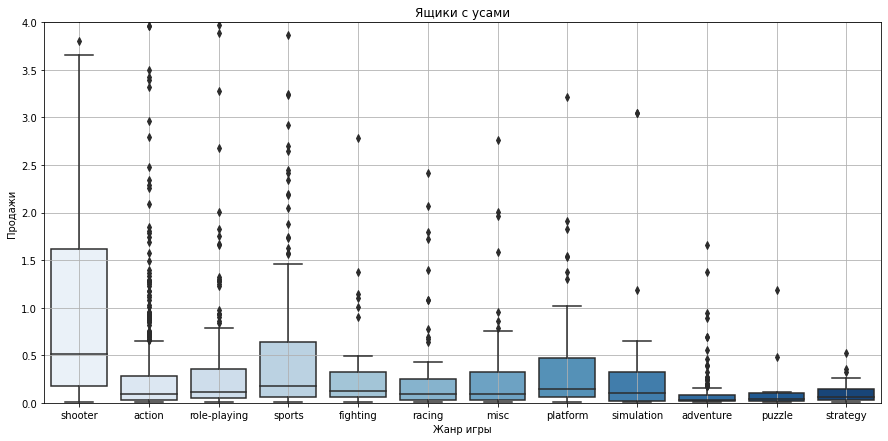

In [30]:
# Ящик с усами
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_new, x='genre', y='total_sales', palette="Blues")
plt.title('Ящики с усами')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи')
plt.ylim([0, 4])
plt.grid()
plt.show()

 - Самые прибыльные жанры Shooter (с большим отрывом), Sports, Platform.

Вывод по исследовательскому анализу данных:
* Активной рост производства игр начался в 2000 году, достиг своего пика в 2007-2009 годах, и после начался уверенный спад производства.
* Топ платформ за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation, Game Boy Advance, Sony Playstation4. 
* Средний срок высокой популярности платформы 6-8 лет, а общий срок жизни около 10 лет
* Мы можем заметить у всех платформ корреляцию, между оценками пользователей и критиков по отношению к продажам.
Однако оценки пользователей слабо влияет на продажи
Оцентки критиков имеют более сильное влияние на продажи. Вероятно люди склонны довкрять оцентам профессионалов.

 - Самые прибыльные жанры Shooter (с большим отрывом), Sports, Platform.

## Шаг 4. Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [31]:
na_df = df_new.query('na_sales > 0')
na_df.info()
na_pivot_table = pd.pivot_table(na_df, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_pivot_table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 31 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             981 non-null    object 
 1   platform         981 non-null    object 
 2   year_of_release  981 non-null    Int64  
 3   genre            981 non-null    object 
 4   na_sales         981 non-null    float64
 5   eu_sales         981 non-null    float64
 6   jp_sales         981 non-null    float64
 7   other_sales      981 non-null    float64
 8   critic_score     571 non-null    float64
 9   user_score       713 non-null    float64
 10  rating           747 non-null    object 
 11  total_sales      981 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 100.6+ KB


,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


- Самые популярные игровые платформы в **Америке** за все время это: PS4, XONE, X360, 3DS, PS3

In [32]:
eu_df = df_new.query('eu_sales > 0')
eu_df.info()
eu_pivot_table = pd.pivot_table(eu_df, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_pivot_table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 31 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1067 non-null   object 
 1   platform         1067 non-null   object 
 2   year_of_release  1067 non-null   Int64  
 3   genre            1067 non-null   object 
 4   na_sales         1067 non-null   float64
 5   eu_sales         1067 non-null   float64
 6   jp_sales         1067 non-null   float64
 7   other_sales      1067 non-null   float64
 8   critic_score     626 non-null    float64
 9   user_score       774 non-null    float64
 10  rating           803 non-null    object 
 11  total_sales      1067 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 109.4+ KB


,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


Самые популярные игровые платформы в **Европе** это: PS4, XONE, PC, 3DS, PS3

In [33]:
jp_df = df_new.query('jp_sales > 0')
jp_df.info()
jp_pivot_table = pd.pivot_table(jp_df, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_pivot_table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             873 non-null    object 
 1   platform         873 non-null    object 
 2   year_of_release  873 non-null    Int64  
 3   genre            873 non-null    object 
 4   na_sales         873 non-null    float64
 5   eu_sales         873 non-null    float64
 6   jp_sales         873 non-null    float64
 7   other_sales      873 non-null    float64
 8   critic_score     278 non-null    float64
 9   user_score       327 non-null    float64
 10  rating           339 non-null    object 
 11  total_sales      873 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 89.5+ KB


,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


Самые популярные игровые платформы в **Японии** это: 3DS, PS4, PSV, PS3, WIIU

Вывод:
- Самые популярные игровые платформы в **Америке** за все время это: PS4, XONE, X360, 3DS, PS3
- Самые популярные игровые платформы в **Европе** это: PS4, XONE, PC, 3DS, PS3
- Самые популярные игровые платформы в **Японии** это: 3DS, PS4, PSV, PS3, WIIU

Во всех рейтингах присутствуют платформы Sony. В Европе и Америке топ 5 схож, меняются лишь места в списке, в Японии же предпочтения сильно отличаются.

### 4.2 Самые популярные жанры (топ-5). Поясните разницу.

In [34]:
na_genre = pd.pivot_table(na_df, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre.head()

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


Топ 5 по **Америке**: Shooter, Action, Sports, Role-playing, Misc

In [35]:
eu_genre = pd.pivot_table(eu_df, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre.head()

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


Топ 5 по **Европе**: Action, Shooter, Sports, , Role-playing, Racing

In [36]:
jp_genre = pd.pivot_table(jp_df, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre.head()

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


Топ 5 по **Японии**: Role-Playing, Action, Fighting,  Misc, Shooter

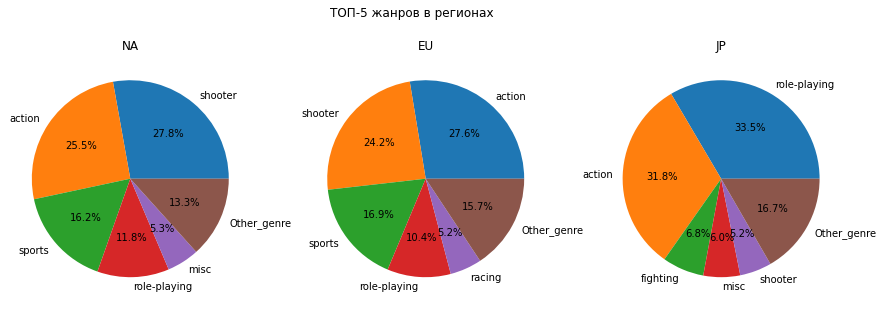

In [41]:
games_fresh = df_new.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Вывод:
* Топ 5 по **Америке**: Shooter, Action, Sports, Role-playing, Misc
* Топ 5 по **Европе**: Action, Shooter, Sports, , Role-playing, Racing
* Топ 5 по **Японии**: Role-Playing, Action, Fighting,  Misc, Shooter

В Европе и Америке топ 5 схож, в Японии же предпочтения сильно отличаются.

Вне зависимости от региона всегда будут популярны игры Action and Shooter

### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [42]:
# поставим заглушку на пропуски в возрастном разряде(предположим, что это игры без возрастных ограничений)
df_new['rating'] = df_new['rating'].fillna('no_rating')

/var/folders/n5/hf1z1cjs4t97l4243vhg328m0000gp/T/ipykernel_99590/2872728172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['rating'] = df_new['rating'].fillna('no_rating')


In [43]:
na_df = df_new.query('na_sales > 0')
na_rating = pd.pivot_table(na_df, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating

,na_sales
rating,
M,96.42
no_rating,64.72
E,50.74
T,38.95
E10+,33.23


In [44]:
eu_df = df_new.query('eu_sales > 0')
eu_rating = pd.pivot_table(eu_df, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,93.44
no_rating,58.95
E,58.06
T,34.07
E10+,26.16


In [45]:
jp_df = df_new.query('jp_sales > 0')
jp_rating = pd.pivot_table(jp_df, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
no_rating,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Рейтинг возраста влияет по каждому региону.

В Америке и Европе опять похожая ситуация. Самые популярные игры с рейтингом 17+, ориентированные на взрослых пользователей, за ними идут игры без возрастного ограничения.

В Японии лидириуют игры с рейтингом 13+ и имеет огромный рынок игр без маркировки возраста. Компании пытаются продавать игры на более молодую аудиторию.

## Шаг 5. Проверим гипотезы

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются


In [46]:
# Сохраним в переменных xone и pc соответствующие данные
xone = df_new.query('platform == "xone"')['user_score']
pc =df_new.query('platform=="pc"')['user_score']
print('Срелняя оценка пользователей XONE:', xone.mean())
print('Срелняя оценка пользователей PC:',pc.mean())

Срелняя оценка пользователей XONE: 6.594545454545453
Срелняя оценка пользователей PC: 6.298360655737703


In [47]:
alpha = 0.01

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Вывод: 
Не получилось отвергнуть нулевую гипотезу.
Рейтинги игр схожи

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [48]:
action = df_new.query('genre == "action"')['user_score']
sports = df_new.query('genre == "sports"')['user_score']
print('Срелняя оценка пользователей жанра Экшн:', action.mean())
print('Срелняя оценка пользователей жанра Спорт:', sports.mean())

Срелняя оценка пользователей жанра Экшн: 6.760606060606054
Срелняя оценка пользователей жанра Спорт: 5.225196850393697


In [49]:
alpha = 0.01

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод:
По результатм рассчетов, мы отвергаетт нулевую гипотезу.

Вероятность получить одинаковые средние рейнтинги по двум жанрам крайне мала.


Вывод по проверке гипотез
- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Отвергаем нулевую гипотезу.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.


## Шаг 6. Общий вывод

Вывод:
Рассмотрев данные, мы привели их к удобному виду: поменяли форматы, примели к нижнему регстру.

Приступили к Исследовательскому анализу

* Активной рост производства игр начался в 2000 году, достиг своего пика в 2007-2009 годах, и после начался уверенный спад производства.
Предположим, что спад связан с появлением смартфонов, и переходом пользователей в мобильное пространство.



* Средний срок высокой популярности платформы 6-8 лет, а общий срок жизни около 10 лет


* Компания Sony выпускает обновленные приставки каджые 6-7 лет, а игры со старых приставок поддерживаются еще окола 3-5 лет после выхода новых.
* Можно предположить что пик продаж на PS4 придется на 2017-2019 года.


По графику боксплот мы сделали выводы, что:
- медианы разлижаются у всех кроме PS3 и x360. 
- Лидерство продаж распределяется так: PS3, X360, PS2, WII и DS. 
- Выбросы имеются у всех моделей, но лидер по выбросам - ds



Кассмотрели возможные взаимосвязи и заметили
 - У всех платформ корреляцию, между оценками 
пользователей и критиков по отношению к продажам. 
 - Однако оценки пользователей слабо влияет на продажи
 - Оцентки критиков имеют более сильное влияние на продажи. Вероятно люди склонны довкрять оцентам профессионалов.

 Вывод по исследовательскому анализу данных:

Активной рост производства игр начался в 2000 году, достиг своего пика в 2007-2009 годах, и после начался уверенный спад производства.
Топ платформ за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation, Game Boy Advance, Sony Playstation4.
Средний срок высокой популярности платформы 6-8 лет, а общий срок жизни около 10 лет
Мы можем заметить у всех платформ корреляцию, между оценками пользователей и критиков по отношению к продажам. Однако оценки пользователей слабо влияет на продажи Оцентки критиков имеют более сильное влияние на продажи. Вероятно люди склонны довкрять оцентам профессионалов.


Примерный портрет игрока в

Американский игрок:

старше 17 лет
предпочитает X360, WII, PS3
играет в Экшен, Спорт или Шутер
Европейский игрок:

старше 17 лет
выберет PS3, X360
играет в Экшен, Спорт или Шутер
Японский игрок:

старше 13 лет
выберет компактную приставку DS
играет в РПГ или Экшн


Вывод по проверке гипотез

Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Не получилось отвергнуть нулевую гипотезу. Рейтинги игр схожи.

Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу. 
Вероятность получить одинаковые средние рейнтинги по двум жанрам крайне мала.